## Inaugural project - Frederik Ahm, Christian Bak & Jacob Jensen

\begin{aligned}
c^{\star},\ell^{\star} & = & \arg\max_{c,\ell}\log(c)-\nu\frac{\ell^{1+\frac{1}{\varepsilon}}}{1+\frac{1}{\varepsilon}}\label{eq:obj}\\
 & \text{s.t.}\nonumber \\
 \end{aligned}


\begin{aligned}
x & = & m+w\ell-\left[\tau_{0}w\ell+\tau_{1}\max\{w\ell-\kappa,0\}\right]\nonumber
\end{aligned}


\begin{aligned}
c & \in & [0,x]\nonumber
\end{aligned}

\begin{aligned}
\ell & \in & [0,1],\nonumber 
\end{aligned}

# Question 1

We start off by defining variables and importing relevant packages.

Afterwards we define our functions as given in the assignment. U_func for the utility function and bc_func for our budget constraint.

Then we define our function, pref_func, as the consumption equal to budget constraint. This is the function which we will now optimize using our imported package, "scipy".

By using all the given values, we can now find the optimal labour, which helps us calculate the consumption and utility, also called c_star and u_star.



In [9]:
#Importing relevant packages:
import numpy as np
from scipy import optimize

#Defining relevant variables
m=1 #money
v=10 #v
e=0.3 #frisch
t0=0.4 #ltax
t1=0.1 #ttax
k=0.4 #cutoff
w=1 #Setting the standard wage rate to 1

#We are now defining the utility function
def u_func(l, c, e, v):
    u = np.log(c) - v * l**(1+1/e) / (1+1/e)
    return u

#We are now defining the budget constraint
def bc_func(m, w, l, t0, t1, k):
    x = m + w * l - w * l * t0 - t1 * max((w*l-k), 0)
    return x

#Setting consumption equal to budget, since we know the consumer will use all of the budget.
#This is the function we want to optimize using scipy
def pref_func(l, w, e, v, t0, t1, k):
    c=bc_func(m, w, l, t0, t1, k)
    return -u_func(l, c, e, v)

#defining optimizer so that we are optimizing the consumers function for l.
def optimizer(w, e, v, t0, t1, k, m):
    opti_func1 = optimize.minimize_scalar(pref_func, method='bounded',bounds=(0,1), args=(w,e,v,t0, t1, k))
    
    #Optimal labour equlas the optimized solution in the function:
    l_star=opti_func1.x
    
    #The optimal consumption is equal to the budget constraint-function with the optimized labour:
    c_star=bc_func(m, w, l_star, t0, t1, k)
    
    #With the optimal- consumption and labour we can now find the newly optimized utility function
    u_star=u_func(l_star, c_star, e, v)
    return [l_star, c_star, u_star]

#We are utilizing the optimized list as follows:
l_star = optimizer(w, e, v, t0, t1, k, m)[0]
c_star = optimizer(w, e, v, t0, t1, k, m)[1]
u_star = optimizer(w, e, v, t0, t1, k, m)[2]

print("The optimal Labour is: ", l_star)
print("The optimal consumption is: ",c_star)
print("The optimal utility is: ", u_star)

The optimal Labour is:  0.40000068196481897
The optimal consumption is:  1.2400003409824096
The optimal utility is:  0.17158308392555632


# Question 2

In this question we will need the the Matplotlib.pyplot pacakge.


Plot $c^*$ and $\ell^*$ as functions of $w$ in the range 0,5 - 1,5

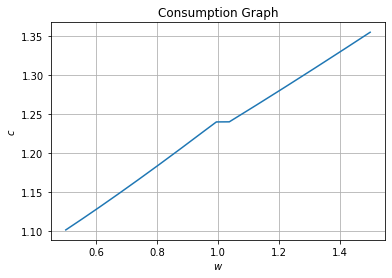

In [10]:
#Import the relevant package for plotting.
import matplotlib.pyplot as plt

#Defining new variable and converting answers from question 1 to numpy arrays
N=10000
w_vec=np.linspace (0.5, 1.5, N)
c_vec=np.empty(N)
l_vec=np.empty(N)

#Enumerating for w
for i,w in enumerate(w_vec):
    l_vec[i], c_vec[i], _ = optimizer(w, e, v, t0, t1, k, m)

#Setting up figure/plot for the consumption graph
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

#Adding labels, grid and title to the graph
ax.set_title('Consumption Graph')
ax.set_xlabel('$w$')
ax.set_ylabel('$c$')
ax.grid(True);

    
#Create figure with plt.
plt.plot(w_vec,c_vec)

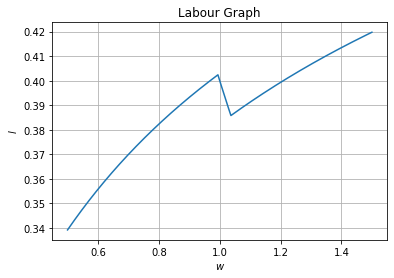

In [11]:
#Repeat for the labour graph
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

#Adding labels, grid and title to the graph
ax.set_title('Labour Graph')
ax.set_xlabel('$w$')
ax.set_ylabel('$l$')
ax.grid(True);

#Creating plot
plt.plot(w_vec,l_vec)

# Question 3

In this question we will calculate the optimal revenue given a new function in the assignment.

Denote the optimal choices of individual $l_i^*$ and $c_i^*$.



In [12]:
#Create empty list for t 
t = np.empty(N)

#Calculate the optimal tax pr. individual
for i in range(N):
    t[i] = t0*w_vec[i]*l_vec[i] + t1*max([w_vec[i]*l_vec[i]-k,0])
    
#Finding the sum which is the total tax revenue
T = sum(t)
print(f'Total tax revenue:: {T:.2f}')

Total tax revenue:: 1630.19


# Question 4

This question will somewhat follow the same procedure as the last question, but the epsilon is now e2=0,1 instead of e=0,3. 

In [13]:
#Changing e to e2
e2 = 0.1

#Creating new empty numpy arrays
w_vec2=np.linspace (0.5, 1.5, N)
c_vec2=np.empty(N)
l_vec2=np.empty(N)

#Enumerating for w using the new numpy arrays
for i,w in enumerate(w_vec):
    l_vec2[i], c_vec2[i], _ = optimizer(w, e2, v, t0, t1, k, m)

#Create empty list for tax pr. individual
t = np.empty(N)

#Calculate the tax revenue for every individual i in the range N = 10.000
for i in range(N):
    t[i] = t0*w_vec2[i]*l_vec2[i] + t1*max([w_vec2[i]*l_vec2[i]-k,0])
    
#Accumulating the individual tax revenue
T = sum(t)

#Printing the result
print(f'Total tax revenue:: {T:.2f}')

Total tax revenue:: 3196.88


# Question 5

In the last question we will find the tax rates and -cutoff, in order to maximize tax revenue under the circumstances of the consumer behaviour.

In [29]:
#Changing e back to 0.3
e = 0.3

#Defining the population
N = 10000

#Defining a function for total tax revenue tt, consisting of the five new vectors for t0,t1,w,l and k
def tt(v):
    t0_vec=v[0]
    t1_vec=v[1]
    k_vec=v[2]
    w_vec2=v[3]
    l_vec2=v[4]

#The sum of every agent's tax-payment results is the total tax revenue ttr
    ttr = np.sum(t0_vec*w_vec2*l_vec2 + t1_vec*np.max(w_vec2*l_vec2-k_vec,0))
    return ttr

#Defining a new budget constraint with the use of the vectors
def bc_new(v):
    t0_vec=v[0]
    t1_vec=v[1]
    k_vec=v[2]
    w_vec2=v[3]
    l_vec2=v[4]
    bc_n = m * v[3] * v[4] - (v[0]*v[3]*v[4]+v[1]*np.max(v[3]*v[4]-v[2],0))
    return bc_n

#Defining the function for the optimal total tax revenue. This is the function we are going to optimize. 
def opt_tt(v):
    t0_vec=v[0]
    t1_vec=v[1]
    k_vec=v[2]
    w_vec2=v[3]
    l_vec2=v[4]
    nc = bc_new(v)
    return -tt(v)

#Defining the new optimizer using scipy.optimzer
#Initial guesses are based upon the parametres given in question 1)
initial_guess=[0.4,0.1,0.4,1,0.5]

#Creating bounds for t0, t1, k, w, l.
bounds = ((0,1) , (0,1) , (0,1) , (0,1.5) , (0,1))

#Creating constraints
constraints = ({"type":"ineq","fun":bc_new})

#Using SLSQP to optimize the opt_tt function
tttr = optimize.minimize(opt_tt,initial_guess,bounds=bounds,constraints=constraints,method="SLSQP")

#Unpacking results from the optimizer
t0_new = tttr.x[0]
t1_new = tttr.x[1]
k_new = tttr.x[2]
w_new = tttr.x[3]
l_new = tttr.x[4]

#Using the method from question 3

#Create empty list for t 
t = np.empty(N)

#Calculate the tax revenue pr. individual given the new parameters
for i in range(N):
    t[i] = t0_new*w_new*l_new + t1_new*max([w_new*l_new-k_new,0])

#Finding the sum which is the total tax revenue
tax_rev_new = sum(t)

#Printing the results
print("The optimal standard labour income tax t0 is: ", tttr.x[0])
print("The optimal top-bracket labour income tax t1 is: ",tttr.x[1])
print("The optimal cut-off for the top labour income is: ", tttr.x[2])
print("The total tax revenue given the new parameters is: ", tax_rev_new)

The optimal standard labour income tax t0 is:  0.8825863861817863
The optimal top-bracket labour income tax t1 is:  0.14679469056923133
The optimal cut-off for the top labour income is:  0.3002262204011014
The total tax revenue given the new parameters is:  15000.000000018441


## Conclusion

Throughout this project we have been trying to maximize tax revenue by optimizing the given parameters. We can conlude that the optimal labour and tax bracket parameters, which are given in question 5, gives us the largest tax revenue; 15.000.